# Análise das Pedaladas

O notebook apresenta uma análise uni e bivariada das variáveis para as pedaladas.

Ao final, animações foram realizadas de modo que a visualização das pedaladas fique mais fácil, apresentando tanto variações geográficas em termos de latitude e longitude, quanto variações de velocidade e elevação em função da distância da atividade.

- Importar bibliotecas necessárias:

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
import time
from IPython import display
from xml.dom import minidom
import math
import warnings as wn

wn.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set_style('whitegrid')

- Colocar três casas decimais e separador de milhar:

In [3]:
pd.options.display.float_format = '{:,.3f}'.format

- Importar o dataset `activities_PBI.csv` criado anteriormente, e mostrar as cinco primeiras linhas:

In [4]:
df = pd.read_csv('activities_PBI.csv')

In [5]:
pedalada = df[df['Tipo de atividade']=='Pedalada']

In [6]:
pedalada.head()

,Data da atividade,Tipo de atividade,Tempo decorrido (s),Distância (km),Arquivo gpx,Tempo de movimentação (s),Distância (m),Velocidade máx. (m/s),Ganho de elevação (m),Elevação mínima (m),Elevação máxima (m),Inclinação máxima (graus),Inclinação média (graus),Hora da atividade,Velocidade média (m/s),Tempo parado (s),Distância Pedalada Acum. (km),Distância Corrida Acum. (km)
0,2018-11-12,Pedalada,713,3.110,1961127693.gpx,664,"3,118.200",7.200,52.165,611.600,654.000,10.100,1.164,20,4.696,49,3.110,0.000
1,2018-11-12,Pedalada,967,5.790,1961222122.gpx,963,"5,798.700",12.500,48.106,582.000,654.100,10.500,-0.828,20,6.021,4,8.900,0.000
2,2018-11-13,Pedalada,1510,6.120,1961955647.gpx,1206,"6,126.300",10.900,67.473,580.600,619.900,10.200,0.186,9,5.080,304,15.020,0.000
3,2018-11-13,Pedalada,682,3.150,1963151981.gpx,675,"3,158.000",7.500,52.305,611.400,654.000,10.200,1.159,20,4.679,7,18.170,0.000
4,2018-11-13,Pedalada,870,5.750,1963151998.gpx,870,"5,753.100",12.300,47.461,582.000,654.000,9.500,-0.853,21,6.613,0,23.920,0.000


- Drop variável `Distância Corrida Acum. (km)`:

In [7]:
pedalada.drop(['Tipo de atividade','Distância Corrida Acum. (km)'], axis=1, inplace=True)

- Checar tipos das variáveis e trocar as necessárias:

In [8]:
pedalada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 174
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Data da atividade              144 non-null    object 
 1   Tempo decorrido (s)            144 non-null    int64  
 2   Distância (km)                 144 non-null    float64
 3   Arquivo gpx                    144 non-null    object 
 4   Tempo de movimentação (s)      144 non-null    int64  
 5   Distância (m)                  144 non-null    float64
 6   Velocidade máx. (m/s)          144 non-null    float64
 7   Ganho de elevação (m)          144 non-null    float64
 8   Elevação mínima (m)            144 non-null    float64
 9   Elevação máxima (m)            144 non-null    float64
 10  Inclinação máxima (graus)      144 non-null    float64
 11  Inclinação média (graus)       144 non-null    float64
 12  Hora da atividade              144 non-null    int

In [8]:
# Data da atividade
pedalada['Data da atividade'] = pd.to_datetime(pedalada['Data da atividade'])

# Arquivo gpx
pedalada['Arquivo gpx'] = pedalada['Arquivo gpx'].astype(str)

- A seguir, uma breve descrição estatística das variáveis quantitativas:

In [10]:
pedalada.describe()

,Tempo decorrido (s),Distância (km),Tempo de movimentação (s),Distância (m),Velocidade máx. (m/s),Ganho de elevação (m),Elevação mínima (m),Elevação máxima (m),Inclinação máxima (graus),Inclinação média (graus),Hora da atividade,Velocidade média (m/s),Tempo parado (s),Distância Pedalada Acum. (km)
count,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000
mean,"3,030.931",13.026,"2,723.111","13,030.082",11.522,177.907,685.141,780.831,18.119,0.063,17.062,5.318,307.819,666.101
std,"3,212.164",11.283,"2,661.570","11,282.459",2.110,178.277,130.504,187.150,11.947,0.661,3.983,1.062,772.902,523.666
min,203.000,0.930,203.000,935.000,5.400,6.711,580.600,619.000,6.700,-2.282,9.000,2.593,0.000,3.110
25%,887.500,5.770,871.000,"5,769.975",10.400,52.373,582.000,622.525,10.100,-0.022,13.000,4.671,0.000,181.125
50%,"1,113.500",6.070,"1,104.500","6,077.150",11.750,65.830,611.300,654.100,10.700,0.000,19.000,5.420,4.000,632.255
75%,"5,213.000",24.415,"4,841.500","24,418.500",12.800,295.497,875.100,"1,017.500",22.225,0.187,20.000,6.044,301.750,969.712
max,"15,482.000",42.810,"11,795.000","42,809.801",16.200,735.125,898.900,"1,055.700",49.200,2.824,23.000,7.561,"6,890.000","1,875.760"


As estatísticas de algumas variáveis sugere a presença de outliers e.g. `Tempo decorrido (s)`, onde a média superior à mediana sugere assimetria à direita (longa calda), e valor máximo acima de $\mu+3*\sigma$, sugerindo presença de outliers.

Portanto, o próximo passo é uma **análise univariada** das variáveis basicamente através de visualizações de distribuição de frequências e boxplot.

## Análise Univariada

1 - Dist. de frequências e boxplot para a variável `Tempo decorrido (s)`:

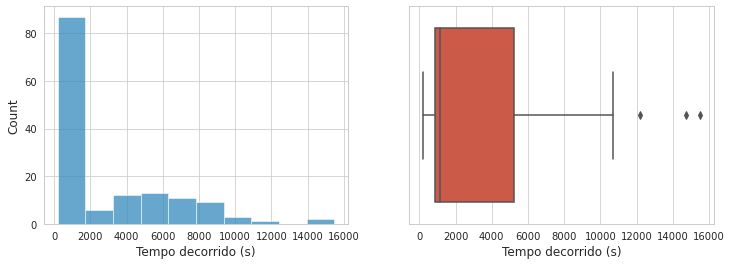

In [11]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(pedalada['Tempo decorrido (s)'],ax=ax[0])
sns.boxplot(x='Tempo decorrido (s)', data=pedalada);

Nota-se, pelos gráficos, a alta assimetria à direita (longa calda), também apresentada no boxplot, com os outliers destacados. Pela dist. de frequências, é possível notar que a maioria das pedaladas teve um menor tempo decorrido, entretanto, pedaladas com maior tempo decorrido tiveram uma maior variabilidade, como pode-se notar pelo range de Q3, e também presença de outliers acima do limite superior. 

A presença de outliers deve ser sempre averiguada, pois tais valores podem influenciar fortemente alguns algoritmos de aprendizado de máquina, como por exemplo regressão linear.

2 - Dist. de frequências e boxplot para a variável `Distância (km)`:

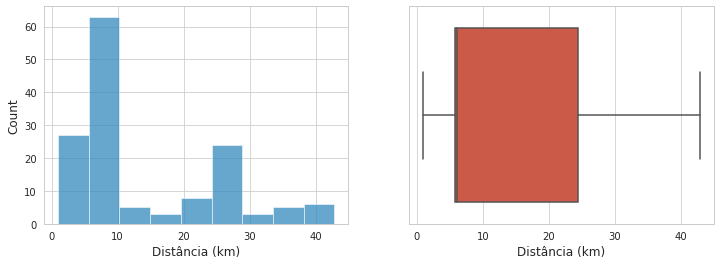

In [12]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(pedalada['Distância (km)'],ax=ax[0])
sns.boxplot(x='Distância (km)', data=pedalada);

Nota-se uma assimetria à direita, entretanto, sem presença de outliers. A dist. de frequências aponta que a maioria das pedaladas teve uma distância entre 0-10 km, seguidas de pedaladas entre 20-30 km, porém com uma frequência muito menor.\
Novamente, pelo boxplot, a mediana (app. 6 km) se encontra muito próxima a Q1 (5.7 km), e Q3 (24.4 km) apresenta grande variabilidade (6 - 24.4 km).

Claramente, a variável `Distância (m)` apresenta a mesma tendência gráfica e, portanto, não será apresentada.

Algumas questões visando melhor entendimento da variável e sua relação com outras podem ser levantadas nesse momento, como por exemplo: pedaladas com maior distância possuem um maior tempo decorrido, ou maior tempo de movimentação, ou maior tempo parado? Tais questões serão abordadas nas análises bivariadas, à frente.

3 - Dist. de frequências e boxplot para a variável `Tempo de movimentação (s)`:

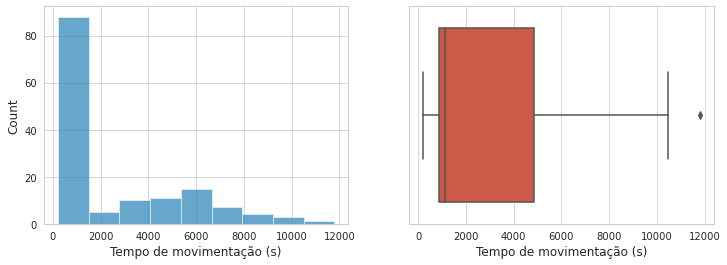

In [13]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(pedalada['Tempo de movimentação (s)'],ax=ax[0])
sns.boxplot(x='Tempo de movimentação (s)', data=pedalada);

A variável apresenta asimertria à direita, com somente um outlier. Isso nos diz que a maioria das pedaladas teve tempo de movimentação baixo, com uma baixa distância, como apresentado anteriormente.\
Entretanto, o boxplot nos diz que pedaladas acima da mediana (1.1k), com Q3 = 4.8k, possuem um grande range de valores i.e. alta variabilidade.

4 - Dist. de frequências e boxplot para a variável `Velocidade máx. (m/s)`:

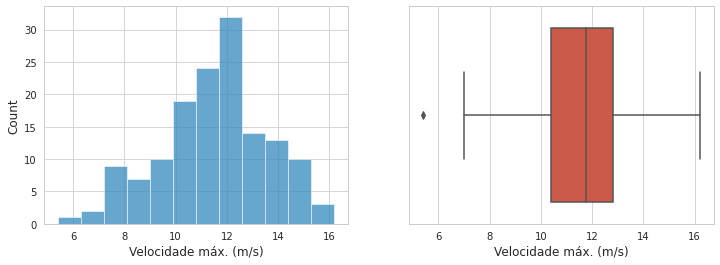

In [14]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(pedalada['Velocidade máx. (m/s)'],ax=ax[0])
sns.boxplot(x='Velocidade máx. (m/s)', data=pedalada);

A variável apresenta uma distribuição simétrica (média próxima da mediana - app. 12 m/s), com presença de apenas um outlier abaixo do limite inferior.

5 - Dist. de frequências e boxplot para a variável `Velocidade média (m/s)`:

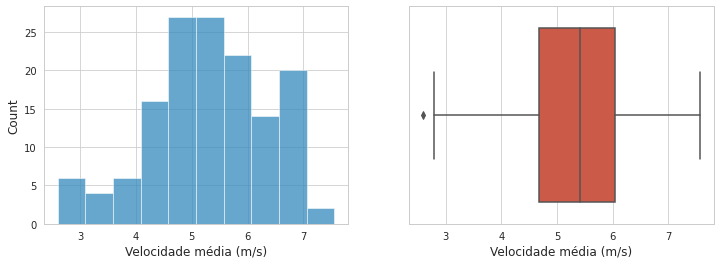

In [15]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(pedalada['Velocidade média (m/s)'],ax=ax[0])
sns.boxplot(x='Velocidade média (m/s)', data=pedalada);

Variável segue uma dist. aproximadamente normal (média próxima da mediana - app. 5.5 m/s), com um outlier abaixo do limite inferior.

6 - Dist. de frequências e boxplot para a variável `Ganho de elevação (m)`:

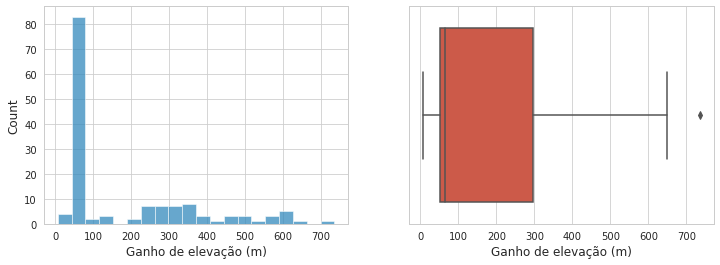

In [16]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(pedalada['Ganho de elevação (m)'],bins=20,ax=ax[0])
sns.boxplot(x='Ganho de elevação (m)', data=pedalada);

Nota-se pela dist. de frequências que a maioria das pedaladas teve baixo ganho de elevação (0-100), como demonstrado também pela mediana próxima ao Q1 no boxplot.\
Ademais, o boxplot apresenta uma grande variabilidade em Q3, com longa calda à direita (assimetria), e presença de outlier.

7 - Dist. de frequências e boxplot para a variável `Elevação mínima (m)`:

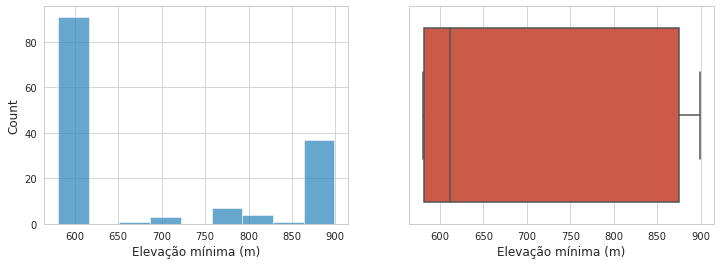

In [17]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(pedalada['Elevação mínima (m)'],ax=ax[0])
sns.boxplot(x='Elevação mínima (m)', data=pedalada);

A elevação mínima apresenta uma distribuição de frequências característica, com maior frequência de atividades com elevação mínima próxima a 600 m, seguida de atividades com elevação mínimma próxima a 900 m.\
Isso pode também ser visto pelo boxplot, o qual não apresenta outliers, entretanto, apresenta uma variabilidade muito grande em Q3 (app. 600-870 m).

8 - Dist. de frequências e boxplot para a variável `Elevação máxima (m)`:

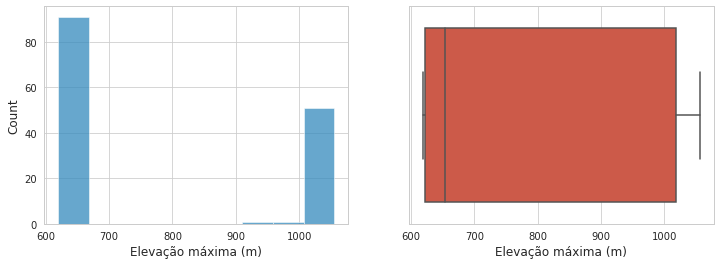

In [18]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(pedalada['Elevação máxima (m)'],ax=ax[0])
sns.boxplot(x='Elevação máxima (m)', data=pedalada);

Os gráficos de dist. de frequências e boxplot apresentam características muito semelhantes à variável elevação mínima, com maior presença de atividades com valores pouco superiores a 600 m, seguidas de atividades pouco acimda de 1000 m, e grande variabilidade em Q3 (app. 650-1000 m).

9 - Histograma e boxplot para a variável `Inclinação máxima (graus)`:

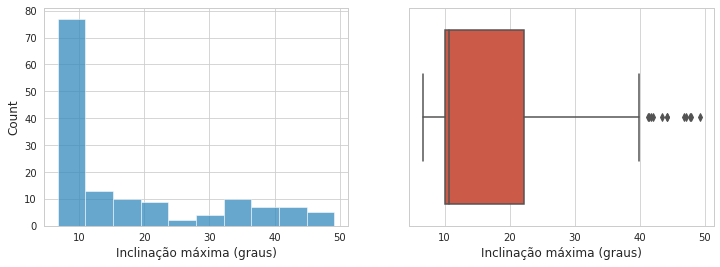

In [19]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(pedalada['Inclinação máxima (graus)'],ax=ax[0])
sns.boxplot(x='Inclinação máxima (graus)', data=pedalada);

A variável apresenta grande assimetria à direita, como disposto nos gráficos de dist. de frequências e boxplot. Ademais, nota-se uma grande variabilidade em Q3, e presença de outliers acima do limite superior, o que nos diz que diversas atividades tiveram uma inclinação máxima elevada, ou seja, subidas íngremes.

10 - Dist. de frequências e boxplot para a variável `Tempo parado (s)`:

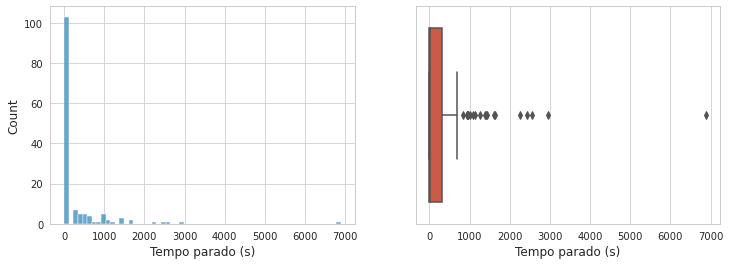

In [20]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(pedalada['Tempo parado (s)'],ax=ax[0])
sns.boxplot(x='Tempo parado (s)', data=pedalada);

A variável apresenta a maioria das atividades com tempo parado zero, como visto nos gráficos de dist. de frequências e boxplot, com mediana próxima a Q1 e valores muito discrepantes i.e. alta presença de outliers.

10 - Dist. de frequências e boxplot para a variável `Hora da atividade`:

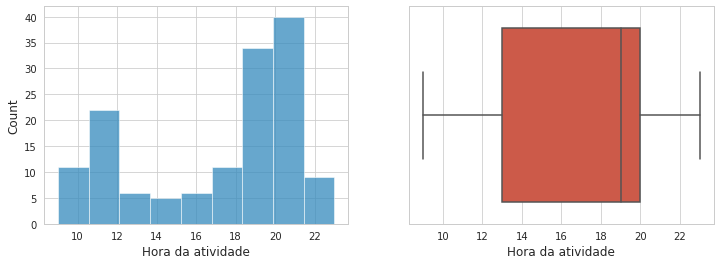

In [21]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(pedalada['Hora da atividade'],ax=ax[0])
sns.boxplot(x='Hora da atividade', data=pedalada);

Nota-se pelo gráfico de dist. de frequências que a maioria das atividades ocorreu ao entardecer/início da noite, seguido por atividades próximas à hora do almoço, sem presença de outliers.\
O boxplot apresenta uma grande variabilidade de valores entre Q1 (13 hr) e mediana (19 hr).

## Análise Bivariada

A análise bivariada das variáveis visa entender melhor a relação entre as mesmas, e ganhar mais alguns insights em relação às pedaladas.

- Tempo parado é maior em distâncias maiores?

O gráfico abaixo demonstra uma tendência de aumento no tempo parado com um aumento da distância percorrida. O coeficiente de correlação de Pearson apontou correlação positiva moderada (app.) entre as variáveis, como expresso no gráfico.\
Ademais, nota-se um valor muito discrepante de tempo parado superior a 6000 segundos.

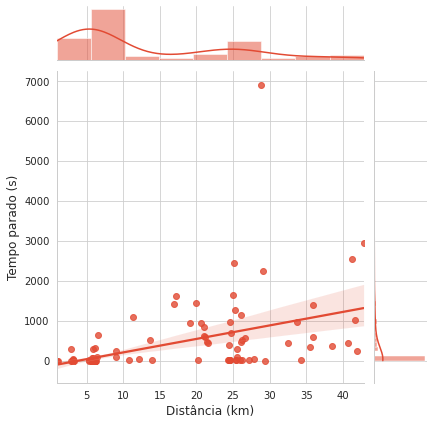

In [22]:
sns.jointplot(x='Distância (km)', y='Tempo parado (s)', data=pedalada, kind='reg');

In [23]:
from scipy.stats import pearsonr

print('Coeficiente de correlação de Pearson:',
pearsonr(pedalada['Distância (km)'], pedalada['Tempo parado (s)'])[0])

Coeficiente de correlação de Pearson: 0.49317841972251014


- Tempo parado é maior em pedaladas com mais subidas i.e. inclinação média positiva?

Abaixo, nota-se que com o aumento da inclinação, existe uma tendência de decrescimento no tempo parado, ou seja, correlação negativa.

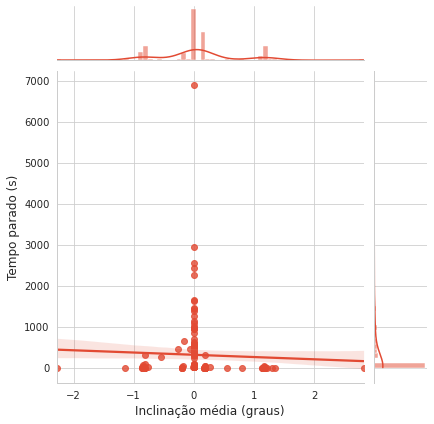

In [24]:
sns.jointplot(x='Inclinação média (graus)', y='Tempo parado (s)', data=pedalada, kind='reg');

Entretanto, quando analisa-se com maior escrutínio, segmentando a inclinação média em valores negativos e positivos, nota-se uma correlação positiva entre tempo parado e inclinações médias negativas, e correlação negativa entre tempo parado e inclinações médias positivas, o que em suma nos diz que em pedaladas com *mais descidas o tempo parado é maior que em pedaladas com subidas.*

In [25]:
# Checagem de desbalanceamento de atividades
print('Número de pedaladas com inclinação média negativa:',
pedalada[pedalada['Inclinação média (graus)']<0].shape[0], 
'\nNúmero de pedaladas com inclinação média positiva:',
pedalada[pedalada['Inclinação média (graus)']>0].shape[0])

Número de pedaladas com inclinação média negativa: 62 
Número de pedaladas com inclinação média positiva: 73


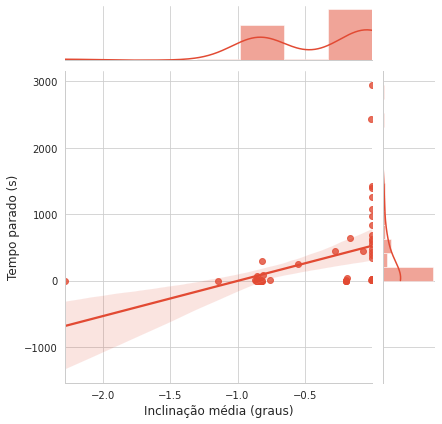

In [26]:
# Inclinação média negativa
sns.jointplot(x='Inclinação média (graus)', y='Tempo parado (s)', 
              data=pedalada[pedalada['Inclinação média (graus)']<0], kind='reg');

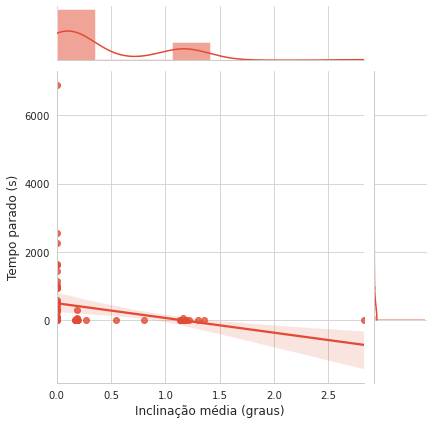

In [31]:
# Inclinação média positiva
sns.jointplot(x='Inclinação média (graus)', y='Tempo parado (s)', 
              data=pedalada[pedalada['Inclinação média (graus)']>=0], kind='reg');

- Velocidade média reduz com aumento da inclinação média?

Existe uma correlação negativa moderada entre velocidade média e inclinação média, ou seja, com um aumento da inclinação do terreno i.e. subidas mais íngrimes, espera-se que a velocidade seja menor.

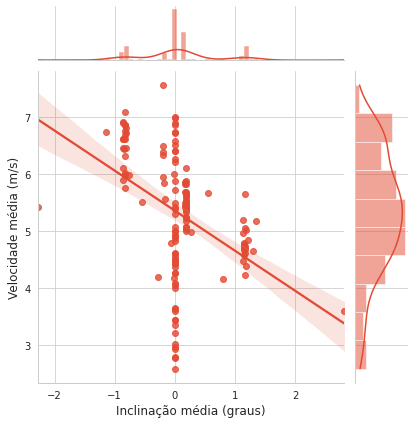

In [28]:
sns.jointplot(x='Inclinação média (graus)', y='Velocidade média (m/s)', data=pedalada, kind='reg');

In [29]:
print('Coeficiente de correlação de Pearson:',
pearsonr(pedalada['Velocidade média (m/s)'], pedalada['Inclinação média (graus)'])[0])

Coeficiente de correlação de Pearson: -0.43657502659610703


- Tempo parado aumenta com maiores ganhos de elevação i.e. pedaladas com mais subidas?

Nota-se pelo gráfico abaixo que existe uma correlação positiva entre ganho de elevação e tempo parado, ou seja, quão maior o ganho de elevação (mais subidas pedaladas), maior é o tempo parado da atividade.\
O mesmo pode ser visto através do coeficiente de correlação de Pearson, resultante com valor moderado e positivo próximo a 0.5.

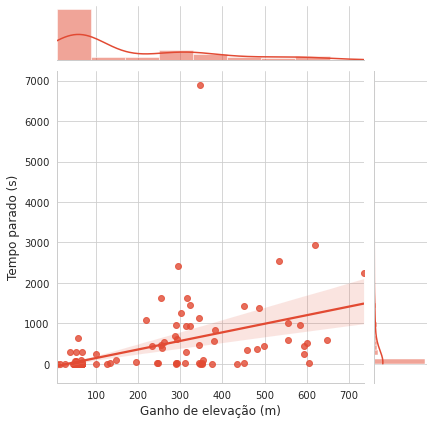

In [30]:
sns.jointplot(x='Ganho de elevação (m)', y='Tempo parado (s)', data=pedalada, kind='reg');

In [32]:
print('Coeficiente de correlação de Pearson:',
pearsonr(pedalada['Ganho de elevação (m)'], pedalada['Tempo parado (s)'])[0])

Coeficiente de correlação de Pearson: 0.48848566788522424


- Tempo parado aumenta com pedaladas mais próximas da hora do almoço (premissa de sol)?

Nota-se, pelos gráficos segmentados entre [:,13] e [13,:], que existe uma correlação positiva entre a hora do atividade no primeiro range, e correlação negativa no segundo, ou seja, em atividades antes do almoço, o tempo parado tende a aumentar até às 13:00, e a reduzir acima.

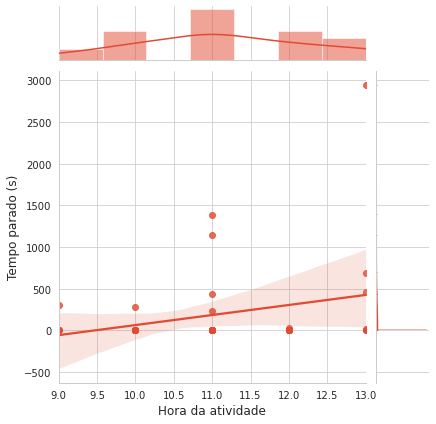

In [161]:
# Antes do almoço - até 13 hr
sns.jointplot(x='Hora da atividade', y='Tempo parado (s)', 
              data=pedalada[pedalada['Hora da atividade']<=13], kind='reg');

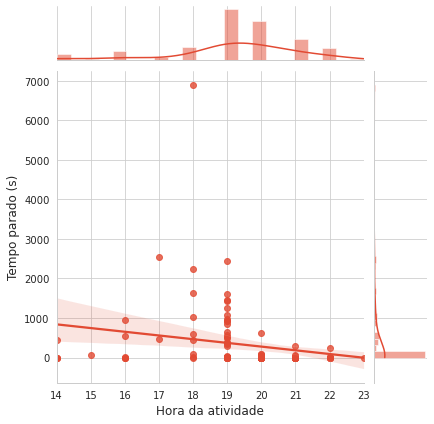

In [159]:
# Após 13 hr
sns.jointplot(x='Hora da atividade', y='Tempo parado (s)', 
              data=pedalada[pedalada['Hora da atividade']>13], kind='reg');

- Segmentação por data e hora:

Nota-se que nos anos de 2018 e 2019, algumas atividades ocorriam pela manhã/almoço com certa frequência, algo incomum no ano de 2020. Mas de maneira majoritária, as pedaladas ocorreram ao entardecer/início da noite, como apresentado anteriormente.

In [148]:
ano = np.array(pedalada['Data da atividade'].dt.year)
hora = np.array(pedalada['Hora da atividade'])
df_time = pd.DataFrame(data = {'ano':ano, 
                               'hora':hora})

pedal_18 = df_time[df_time['ano']==2018]
hora_18 = pedal_18['hora'].tolist()

pedal_19 = df_time[df_time['ano']==2019]
hora_19 = pedal_19['hora'].tolist()

pedal_20 = df_time[df_time['ano']==2020]
hora_20 = pedal_20['hora'].tolist()

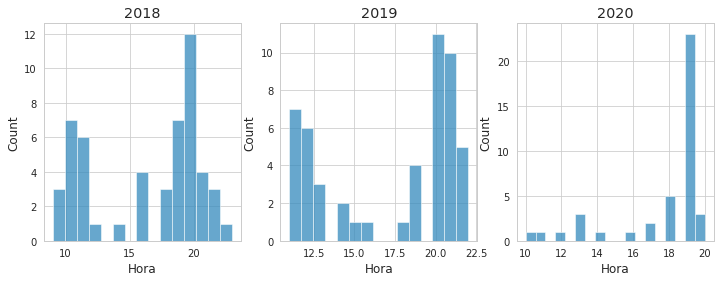

In [149]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
sns.histplot(hora_18,bins=15,ax=ax[0]); ax[0].set_title('2018'); ax[0].set_xlabel('Hora')
sns.histplot(hora_19,bins=15,ax=ax[1]); ax[1].set_title('2019'); ax[1].set_xlabel('Hora')
sns.histplot(hora_20,ax=ax[2]); ax[2].set_title('2020'); ax[2].set_xlabel('Hora');

- Análise de evento extremo - velocidade média < 3 m/s:

Nota-se que a inclinação máxima apresentada na atividade é de 46.8°, ou seja, é uma subida relativamente íngrime (para cada um metro de elevação, anda-se app. 1.4 m).\
Entretanto, o dataframe abaixo apresenta uma atividade semelhante (variáveis como elevação, inclinação e distância semelhantes), entretanto, a velocidade média é superior à da primeira atividade.
Esse caso demonstra a importância da pedalada ser analisada como um todo, pois atividades semelhantes, talvez no mesmo terreno, culminem em resultados diferentes. 

In [65]:
pedalada[(pedalada['Distância (km)'] > 14) & (pedalada['Distância (km)'] < 18)]

,Tempo decorrido (s),Distância (km),Arquivo gpx,Tempo de movimentação (s),Distância (m),Velocidade máx. (m/s),Ganho de elevação (m),Elevação mínima (m),Elevação máxima (m),Inclinação máxima (graus),Inclinação média (graus),Hora da atividade,Velocidade média (m/s),Tempo parado (s),Distância Pedalada Acum. (km)
Data da atividade,,,,,,,,,,,,,,,
2020-07-21,7300,17.180,3797732628.gpx,5681,"17,183.801",13.800,316.678,889.300,"1,043.500",47.700,0.003,19,3.025,1619,"1,109.760"
2020-08-26,7948,16.920,3970470370.gpx,6527,"16,924.699",8.200,451.080,823.700,"1,044.700",46.800,-0.001,19,2.593,1421,"1,502.800"


- Análise de evento extremo - velocidade máx. < 6 m/s:

A atividade teve uma distância baixa (<1 km), com subida leve (inclinação média 2.8° e máxima 11.6°), e uma velocidade média relativamente baixa (3.6 m/s), às 11:00AM. Talvez a causa para tal outlier seja justamente a baixa distância com subida leve, mas com possibilidade de sol.

In [46]:
pedalada[pedalada['Velocidade máx. (m/s)'] < 6]

,Tempo decorrido (s),Distância (km),Arquivo gpx,Tempo de movimentação (s),Distância (m),Velocidade máx. (m/s),Ganho de elevação (m),Elevação mínima (m),Elevação máxima (m),Inclinação máxima (graus),Inclinação média (graus),Hora da atividade,Velocidade média (m/s),Tempo parado (s),Distância Pedalada Acum. (km)
Data da atividade,,,,,,,,,,,,,,,
2018-11-30,259,0.930,1992565938.gpx,259,935.000,5.400,26.300,599.500,626.900,11.600,2.824,11,3.610,0,139.520


- Análise do evento extremo - tempo parado superior a 6000 s:

A análise do evento extremo apresenta uma pedalada com valores que poderiam ser considerados normais e.g. velocidade ou elevação, mas com tempo de movimentação praticamente metade do tempo total.\
Tal evento é analisado ao longo de todo o trajeto, para ver quantas paradas ocorreram, e qual o tempo de cada uma, ao final do notebook.

In [44]:
pedalada[pedalada['Tempo parado (s)']>6000].drop(['Arquivo gpx','Distância Pedalada Acum. (km)'],axis=1)

,Tempo decorrido (s),Distância (km),Arquivo gpx,Tempo de movimentação (s),Distância (m),Velocidade máx. (m/s),Ganho de elevação (m),Elevação mínima (m),Elevação máxima (m),Inclinação máxima (graus),Inclinação média (graus),Hora da atividade,Velocidade média (m/s),Tempo parado (s)
Data da atividade,,,,,,,,,,,,,,
2020-06-25,15482,28.770,3671525497.gpx,8592,"28,775.900",11.800,347.475,875.100,"1,017.500",36.800,0.003,18,3.349,6890


# Animações

Referência: [[1]](https://www.geodose.com/2018/04/create-gpx-tracking-file-visualizer-python.html)

- Importar função `parse_gpx` criada para analisar os arquivos gpx:

In [9]:
from parse_gpx import parse_gpx

## Pedalada 1 

- Analisar pedalada de maior distância:

In [62]:
pedalada[pedalada['Distância (km)'] == 42.81]['Arquivo gpx']

Data da atividade
2020-07-25    3812021964.gpx
Name: Arquivo gpx, dtype: object

- Abrir arquivo gpx (similar a xml), e pegar elementos:

In [63]:
file_pedal = open('activities/3812021964.gpx')
xmldoc_pedal = minidom.parse(file_pedal)
track_pedal = xmldoc_pedal.getElementsByTagName('trkpt')
elevation_pedal = xmldoc_pedal.getElementsByTagName('ele')
dtime_pedal = xmldoc_pedal.getElementsByTagName('time')
n_track_pedal = len(track_pedal)

- Aplicar função `parse_gpx` de análise do documento importada:

In [64]:
lon_pedal = []
lat_pedal = []
elev_pedal = []
time_pedal = []

parse_gpx(track_pedal, elevation_pedal, dtime_pedal, n_track_pedal, 
          lon_pedal, lat_pedal, elev_pedal, time_pedal)

- Criar função `geo2cart` para converter coordenadas geodésicas para cartesianas, função `distance` para calcular a distância Euclidiana entre dois pontos, e função `velocity` para calcular a velocidade em função da distância e tempo:

In [10]:
def geo2cart(lon,lat,elev):
    a = 6378137 # WGS-84 ellipsoid major axis
    b = 6356752.3142 # WGS-84 minor axis
    e2 = 1-(b**2/a**2)
    N = float(a/math.sqrt(1-e2*(math.sin(math.radians(abs(lat)))**2)))
    X = (N+elev)*math.cos(math.radians(lat))*math.cos(math.radians(lon))
    Y = (N+elev)*math.cos(math.radians(lat))*math.sin(math.radians(lon))
    return X,Y

def distance(x1,y1,x2,y2):
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

def velocity(x0,y0,x1,y1,t0,t1):
    try:
        delta_x = distance(x0,y0,x1,y1)
        delta_t = t1-t0
        return float(delta_x/delta_t)
    except:
        return 0

- Cálculo das variáveis posição cartesiana, distância acumulada, e velocidade:

In [66]:
dist_pedal_list = [0.]
vel_pedal_list = [0.]
l=0
for k in range(n_track_pedal-1):
    if k<(n_track_pedal-1):
        l+=1
    else:
        l=k
        
    # posição cartesiana
    XY0_p = geo2cart(lon_pedal[k], lat_pedal[k], elev_pedal[k])
    XY1_p = geo2cart(lon_pedal[l], lat_pedal[l], elev_pedal[l])
    
    # distância acumulada
    dx_p = distance(XY0_p[0], XY0_p[1], XY1_p[0], XY1_p[1])
    sum_dx_p = dx_p + dist_pedal_list[-1]
    dist_pedal_list.append(sum_dx_p)
    
    # velocidade
    vel_p = velocity(XY0_p[0], XY0_p[1], XY1_p[0], XY1_p[1], time_pedal[k], time_pedal[l])
    vel_pedal_list.append(vel_p)

- Plotar a animações:

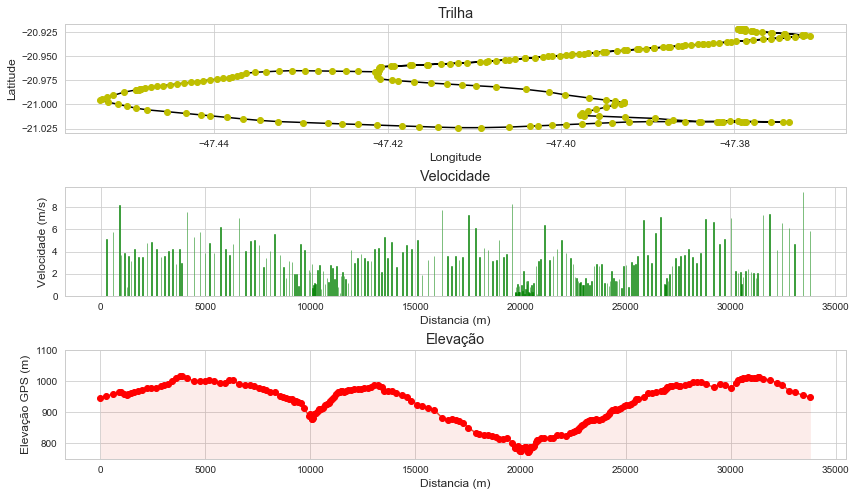

In [69]:
# Trilha
f,(trilha_p,velocidade_p,elevacao_p)=plt.subplots(3,1,figsize=(14,8))
plt.subplots_adjust(hspace=0.5)
trilha_p.plot(lon_pedal[::50],lat_pedal[::50],'k')
trilha_p.set_ylabel("Latitude")
trilha_p.set_xlabel("Longitude")
trilha_p.set_title("Trilha")

# Velocidade
velocidade_p.bar(dist_pedal_list[::50],vel_pedal_list[::50],30,color='w',edgecolor='w')
velocidade_p.set_title("Velocidade")
velocidade_p.set_xlabel("Distancia (m)")
velocidade_p.set_ylabel("Velocidade (m/s)")

# Elevação
base_reg=0
elevacao_p.plot(dist_pedal_list[::50],elev_pedal[::50])
elevacao_p.fill_between(dist_pedal_list[::50],elev_pedal[::50],base_reg,alpha=0.1)
elevacao_p.set_ylim(750,1100)
elevacao_p.set_title("Elevação")
elevacao_p.set_xlabel("Distancia (m)")
elevacao_p.set_ylabel("Elevação GPS (m)")

# Animação
for i in range(0,n_track_pedal,50):
    trilha_p.plot(lon_pedal[i],lat_pedal[i],'yo')
    velocidade_p.bar(dist_pedal_list[i],vel_pedal_list[i],30,color='g',edgecolor='g')
    elevacao_p.plot(dist_pedal_list[i],elev_pedal[i],'ro')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(.001)
    
plt.show()

Nota-se, pelos gráficos, que quando decréscimos de elevação ocorrem, a velocidade torna-se maior, ou seja, ela aumenta em descidas.\
Isso fica bem claro perto dos 20 km, onde a elevação é mínima, próxima de 800 m, e a velocidade, inversamente proporcional, possui um pico de aproximadamente 8 m/s. Logo após, no início da subida, a velocidde reduz para valores próxmios a 2.5 m/s, acompanhando, portanto, a elevação do terreno.\
A velocidade atinge seu valor máximo no final da pedalada, com aproximadamente 10 m/s, notavelmente, também em uma descida.

## Pedalada 2 - Evento Extremo

- Analisar o evento extremo $\rightarrow$ pedalada com maior tempo parado:

In [11]:
pedalada[pedalada['Tempo parado (s)']>5000]['Arquivo gpx']

111    3671525497.gpx
Name: Arquivo gpx, dtype: object

- Abrir arquivo gpx:

In [12]:
file_pedal = open('activities/3671525497.gpx')
xmldoc_pedal = minidom.parse(file_pedal)
track_pedal = xmldoc_pedal.getElementsByTagName('trkpt')
elevation_pedal = xmldoc_pedal.getElementsByTagName('ele')
dtime_pedal = xmldoc_pedal.getElementsByTagName('time')
n_track_pedal = len(track_pedal)

- Aplicar função `parse_gpx` para analisar arquivo aberto:

In [13]:
lon_pedal = []
lat_pedal = []
elev_pedal = []
time_pedal = []

parse_gpx(track_pedal, elevation_pedal, dtime_pedal, n_track_pedal, 
          lon_pedal, lat_pedal, elev_pedal, time_pedal)

- Calcular variáveis posição cartesiana, distância acumulada, e velocidade:

In [14]:
dist_pedal_list = [0.]
vel_pedal_list = [0.]
l=0
for k in range(n_track_pedal-1):
    if k<(n_track_pedal-1):
        l+=1
    else:
        l=k
    
    # posição cartesiana
    XY0_p = geo2cart(lon_pedal[k], lat_pedal[k], elev_pedal[k])
    XY1_p = geo2cart(lon_pedal[l], lat_pedal[l], elev_pedal[l])
    
    # distância
    dx_p = distance(XY0_p[0], XY0_p[1], XY1_p[0], XY1_p[1])
    sum_dx_p = dx_p + dist_pedal_list[-1]
    dist_pedal_list.append(sum_dx_p)
    
    # velocidade
    vel_p = velocity(XY0_p[0], XY0_p[1], XY1_p[0], XY1_p[1], time_pedal[k], time_pedal[l])
    vel_pedal_list.append(vel_p)

- Plotar animações:

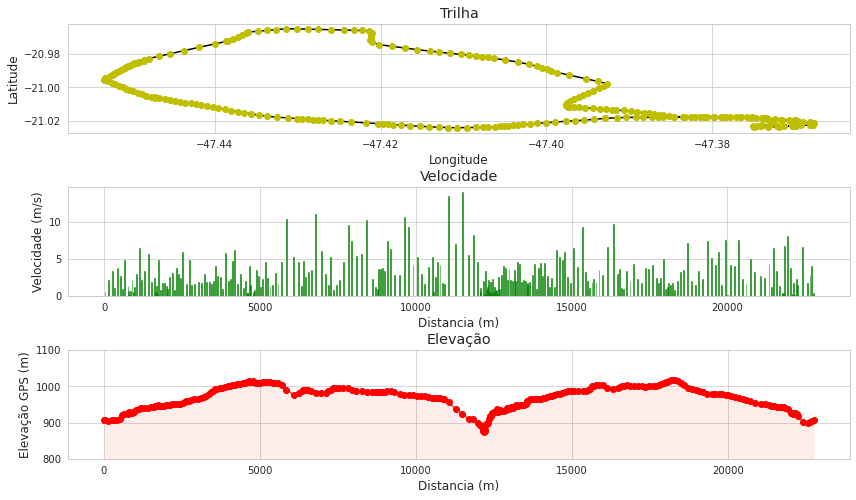

In [25]:
# Trilha
f,(trilha_p,velocidade_p,elevacao_p)=plt.subplots(3,1,figsize=(14,8))
plt.subplots_adjust(hspace=0.5)
trilha_p.plot(lon_pedal[::20],lat_pedal[::20],'k')
trilha_p.set_ylabel("Latitude")
trilha_p.set_xlabel("Longitude")
trilha_p.set_title("Trilha")

# Velocidade
velocidade_p.bar(dist_pedal_list[::20],vel_pedal_list[::20],30,color='w',edgecolor='w')
velocidade_p.set_title("Velocidade")
velocidade_p.set_xlabel("Distancia (m)")
velocidade_p.set_ylabel("Velocidade (m/s)")

# Elevação
base_reg=0
elevacao_p.plot(dist_pedal_list[::20],elev_pedal[::20])
elevacao_p.fill_between(dist_pedal_list[::20],elev_pedal[::20],base_reg,alpha=0.1)
elevacao_p.set_ylim(800,1100)
elevacao_p.set_title("Elevação")
elevacao_p.set_xlabel("Distancia (m)")
elevacao_p.set_ylabel("Elevação GPS (m)")

# Animação
for i in range(0,n_track_pedal,20):
    trilha_p.plot(lon_pedal[i],lat_pedal[i],'yo')
    velocidade_p.bar(dist_pedal_list[i],vel_pedal_list[i],30,color='g',edgecolor='g')
    elevacao_p.plot(dist_pedal_list[i],elev_pedal[i],'ro')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(.001)
    
plt.show()

O gráfico de coordenadas geográficas aponta para a mesma trilha apresentada na pedalada de maior kilometragem (i.e. parcialmente). Nota-se características similares, como por exemplo aumento da velocidade na descida (redução da elevação), em aproximadamente 12 km, com velocidade muito baixa logo aós tal descida.\
Entretanto, nesse caso, quando a elevação é mínima e próxima a 900 m, a velocidade atinge picos próximos a 15 m/s, muito superiores aos apresentados na pedalada anteiror.

Entretanto, nota-se, pelos gráficos acima, que não fica muito claro onde ocorreram as paradas que somaram no maior tempo. Portanto, abaixo, um novo gráfico com a variação da velocidade em função das horas foi feito, visando analisar melhor as paradas realizadas:

- Cria lista com a hora da pedalada:

In [27]:
time_plot = []

for s in range(n_track_pedal):
        dt = dtime_pedal[s].firstChild.nodeValue
        time_split = dt.split('T')
        hms_split = time_split[1].split(':')
        time_hour = hms_split[0]
        time_min = hms_split[1]
        time_sec = hms_split[2].split('Z')[0]
        time_final = time_hour+':'+time_min+':'+time_sec
        time_plot.append(time_final)

- Cria dataframe para transformação da lista em datetime:

In [28]:
time_df = pd.DataFrame(data={'Hora':time_plot,
                            'Velocidade':vel_pedal_list})
time_df['Hora'] = pd.to_datetime(time_df['Hora'], format='%H:%M:%S')
time_df.head()

,Hora,Velocidade
0,1900-01-01 18:51:00,0.000
1,1900-01-01 18:51:00,0.000
2,1900-01-01 18:51:00,0.111
3,1900-01-01 18:51:00,0.644
4,1900-01-01 18:51:00,0.533


- Plota o gráfico:

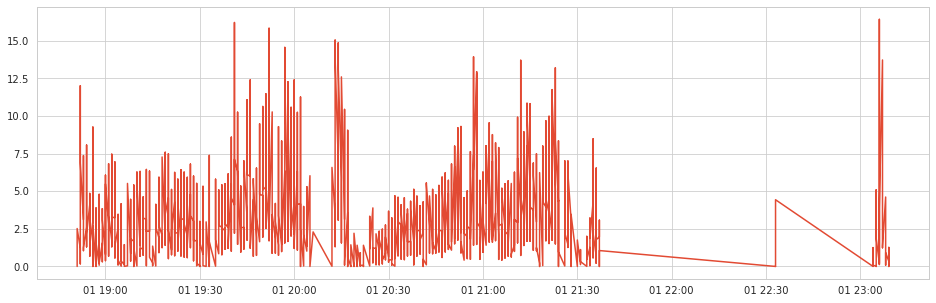

In [26]:
plt.figure(figsize=(16,5))
plt.plot(time_df['Hora'], time_df['Velocidade']);

Nota-se, pelo gráfico acima, que não ocorreu uma parada em que a atividade ficou estática por muito tempo, mas sim diversas paradas com pouco tempo, que juntar somarar no maior tempo parado dentro das atividades.